# Vehicle Fraud Detection

## Loading Data and Data Exploration

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading data
data = pd.read_csv('carclaims.csv')

# Basic info on data
print("Dataset shape:", data.shape) # Rows and Columns of dataset
print("Data Type:", data.info())
# print("\nMissing Values\n", data.isnull().sum().sum()) 
print("\nClass Distribution", data['FraudFound'].value_counts(normalize=True))


Dataset shape: (15420, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNum

## Data Preprocessing

In [2]:
data.head(1)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No


In [3]:
# copy of data to avoid modifying original data
data_copy = data.copy()

In [4]:
data_copy.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [5]:
# check any columns for repeating data 
data_copy[['AgeOfPolicyHolder', 'Age']]

,AgeOfPolicyHolder,Age
0,26 to 30,21
1,31 to 35,34
2,41 to 50,47
3,51 to 65,65
4,31 to 35,27
...,...,...
15415,31 to 35,35
15416,31 to 35,30
15417,26 to 30,24
15418,31 to 35,34


In [6]:
data_copy[['BasePolicy', 'PolicyType', 'VehicleCategory']]

,BasePolicy,PolicyType,VehicleCategory
0,Liability,Sport - Liability,Sport
1,Collision,Sport - Collision,Sport
2,Collision,Sport - Collision,Sport
3,Liability,Sedan - Liability,Sport
4,Collision,Sport - Collision,Sport
...,...,...,...
15415,Collision,Sedan - Collision,Sedan
15416,Liability,Sedan - Liability,Sport
15417,Collision,Sedan - Collision,Sedan
15418,All Perils,Sedan - All Perils,Sedan


### Removing redundant data columns
### Separating claim data from fraud status 

In [7]:
# list of all redundant data points
unwanted_data = ['PolicyNumber', 'BasePolicy', 'VehicleCategory', 'Age', 'FraudFound']

#  Remove redundant data points
X = data_copy.drop(unwanted_data, axis=1)

#table that links entry ID in X to fraud value
y = data_copy['FraudFound']

In [8]:
# Extract categorical data, all data columns with datatype = object
categorical_columns = X.select_dtypes(include=['object']).columns.tolist() # storing data columns as a list for easier handling
encoder = OneHotEncoder(sparse_output=False)

#  applying encoder to categorical data
# fit_transform identifies all unique values in a category and transforms them into binary
one_hot = encoder.fit_transform(X[categorical_columns])

# Data frame of encoded columns
one_hot_X = pd.DataFrame(one_hot, columns = encoder.get_feature_names_out(categorical_columns))

# concat encoded data frame with original data
X_encoded = pd.concat([X, one_hot_X], axis = 1)

# Drop original categorical columns
X_encoded = X_encoded.drop(categorical_columns, axis = 1)
# print(f"Encoded data :\n {X_encoded}")

### Splitting Dataset, Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size = 0.2, random_state = 0
)

## Building Algorithms to Test Various Methods

### Logistic Regression

Accuracy: 0.6549935149156939
              precision    recall  f1-score   support

          No       0.99      0.64      0.78      2902
         Yes       0.14      0.91      0.24       182

    accuracy                           0.65      3084
   macro avg       0.56      0.78      0.51      3084
weighted avg       0.94      0.65      0.75      3084



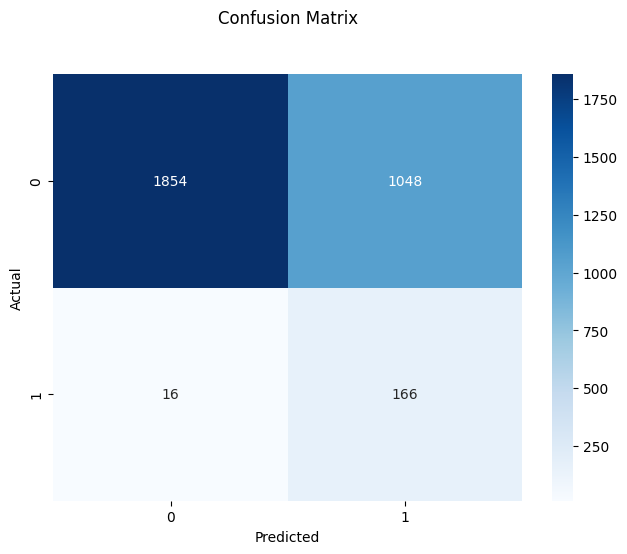

(LogisticRegression(class_weight='balanced', max_iter=9000, random_state=0),
 array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'No'], dtype=object),
 array([[1854, 1048],
        [  16,  166]]))

In [11]:
def logistic_regression(X_train, X_test, y_test, y_train):
    lr_model = LogisticRegression(
        class_weight = 'balanced', # balanced it sufficient as fraud is the minority class
        max_iter = 9000,
        random_state = 0
    )
    ## Accuracy 'No' = 99% 'Yes' = 14%
    #  Recall 'No' = 0.64 'Yes' = 91%
    #  Good at at identifying non fraudulent claims, terrible at identifying fraud
    #  Over classifies fraudulent claims
    #  This is because fraud claims are a small portion of samples so classes are imbalanced, so difficult to learn
    # ##
    
    # Training model
    lr_model.fit(X_train, y_train)
    
    # Make Predictions
    y_pred = lr_model.predict(X_test)
    
    # Evaluation with confusion Matrix
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    # cnf_matrix
    
    # create heatmap
    sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt='d')
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return lr_model, y_pred, cnf_matrix

logistic_regression(X_train, X_test, y_test, y_train)
    

### Decision Tree

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 50}
Best score: DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50)
Accuracy: 0.6121919584954605
              precision    recall  f1-score   support

          No       1.00      0.59      0.74      2902
         Yes       0.13      0.97      0.23       182

    accuracy                           0.61      3084
   macro avg       0.56      0.78      0.48      3084
weighted avg       0.95      0.61      0.71      3084



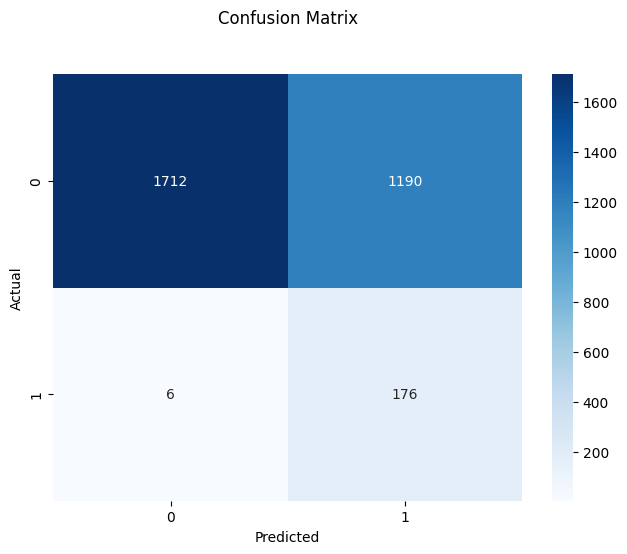

In [ ]:
def decision_tree(X_test,X_train, y_test, y_train):
    
    param_grid = {
        'criterion': ['entropy', 'gini', 'log_loss'],
        'max_depth': [3, 5, 7, 10],
        'min_samples_leaf': [50, 75, 100]
    }
    
    # weights = { 
    #     'No': 1,
    #     'Yes': 5
    # }
    
    dt_model = DecisionTreeClassifier()
    
    recall_scorer = make_scorer(recall_score, pos_label="Yes")
    
    # grid search helps find optimal parameters
    grid_search = GridSearchCV(
        estimator=dt_model,
        param_grid=param_grid,
        cv=5,
        scoring=recall_scorer,
        n_jobs=1
    )
    
    X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)
    
    grid_search.fit(X_train_res, y_train_res)
    # grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    print("Best parameters:", best_params)
    print("Best score:", best_model)
    
    # Make Predictions
    y_pred = grid_search.predict(X_test)
    
    # Evaluation with confusion Matrix
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    # create heatmap
    sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt='d')
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return

decision_tree(X_test, X_train, y_test, y_train)
# Large number of false negatives, however very good at categorising non fraud,
# with default weight
# Implies heavy majority class bias

# When custom weighting applied to minority class,
# Dramatic reduction in false negatives, with increase in false positives 
# Very few fraud cases are now mis-classified

# Removing custom weight and adding SMOTE achieves the same outcome as custom weighting

### Random Forest Classifier 

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50}
Best score: RandomForestClassifier(class_weight={'No': 1, 'Yes': 5}, max_depth=10,
                       min_samples_leaf=50)
Accuracy: 0.62905317769131
              precision    recall  f1-score   support

          No       0.99      0.61      0.76      2902
         Yes       0.13      0.95      0.23       182

    accuracy                           0.63      3084
   macro avg       0.56      0.78      0.49      3084
weighted avg       0.94      0.63      0.72      3084



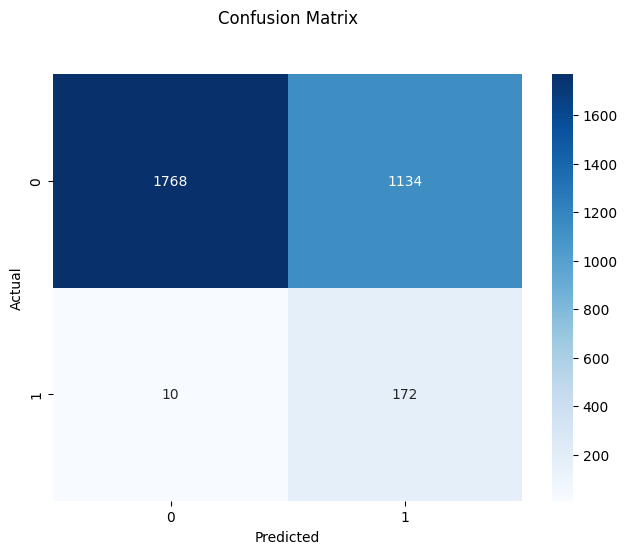

In [ ]:
def random_forest(X_test, X_train, y_test, y_train):
    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [3, 5, 7, 10],
        'min_samples_leaf': [50, 75, 100]
    }
    
    rf_model = RandomForestClassifier(class_weight={
        'No': 1,
        'Yes': 5
    })
    
    recall_scorer = make_scorer(recall_score, pos_label = "No")
    
    grid_search = GridSearchCV(
        estimator= rf_model,
        param_grid= param_grid,
        scoring= recall_scorer,
        cv = 5,
        n_jobs= 1
    )
    
    # Without SMOTE, the dataset was too small for the model to learn
    # ended up classifying everything as not fraud
    X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)
    # After SMOTE applied, better performance at classifying fraud, large number of false positives
    
    grid_search.fit(X_train_res, y_train_res)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    print("Best parameters:", best_params)
    print("Best score:", best_model)
    
    # Make Predictions
    y_pred = grid_search.predict(X_test)
    
    # Evaluation with confusion Matrix
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    # create heatmap
    sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt='d')
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return 

random_forest(X_test, X_train, y_test, y_train)

#### Decision Tree has a similar performance as Random Forest
    Small dataset leads to the model failing to learn,
    Larger dataset is needed to train

### K-Nearest Neighbours

Accuracy: 0.6267833981841764
              precision    recall  f1-score   support

          No       0.97      0.62      0.76      2902
         Yes       0.10      0.69      0.18       182

    accuracy                           0.63      3084
   macro avg       0.54      0.66      0.47      3084
weighted avg       0.92      0.63      0.72      3084



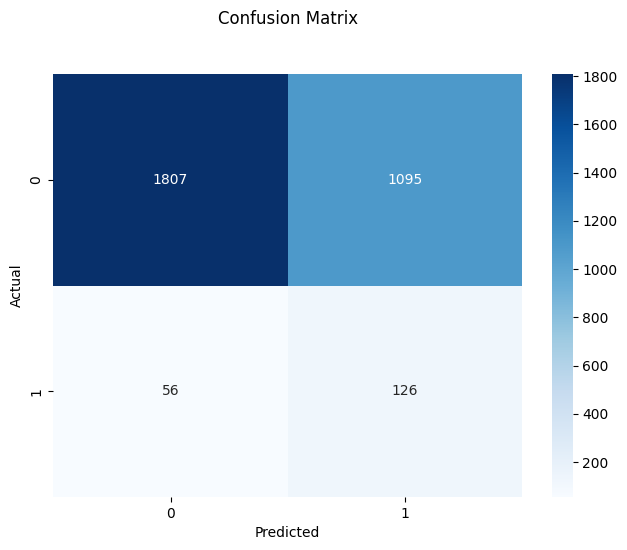

In [ ]:
# Normalising data for K_neighbours and K-Mean
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

def k_neighbours(X_train_scaled, X_test_scaled, y_train, y_test):
    
    knn_model = KNeighborsClassifier(
        weights='uniform',
        algorithm='auto',
        p = 2, # increasing p, increases number of false positives 
        n_jobs=1
    )
    
    # knn_model.fit(X_train_scaled, y_train)
    
    # poor performance with default dataset, large amount of false negatives, when p=2, dataset is too small
    
    X_train_res, y_train_res = SMOTE().fit_resample(X_train_scaled, y_train)
    # After SMOTE applied, better performance at classifying fraud, large number of false positives when p=2
    
    knn_model.fit(X_train_res, y_train_res)
    
    y_pred = knn_model.predict(X_test_scaled)
    
    # Evaluation with confusion Matrix
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    # create heatmap
    sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt='d')
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return

k_neighbours(X_train_scaled, X_test_scaled, y_train, y_test)

### K-Means

Before OverSampling, counts of label '1': 741
Before OverSampling, counts of label '0': 11595 

After OverSampling, counts of label '1': 11595
After OverSampling, counts of label '0': 11595
Accuracy: 0.9189364461738002
              precision    recall  f1-score   support

          No       0.94      0.98      0.96      2902
         Yes       0.03      0.01      0.02       182

    accuracy                           0.92      3084
   macro avg       0.48      0.49      0.49      3084
weighted avg       0.89      0.92      0.90      3084



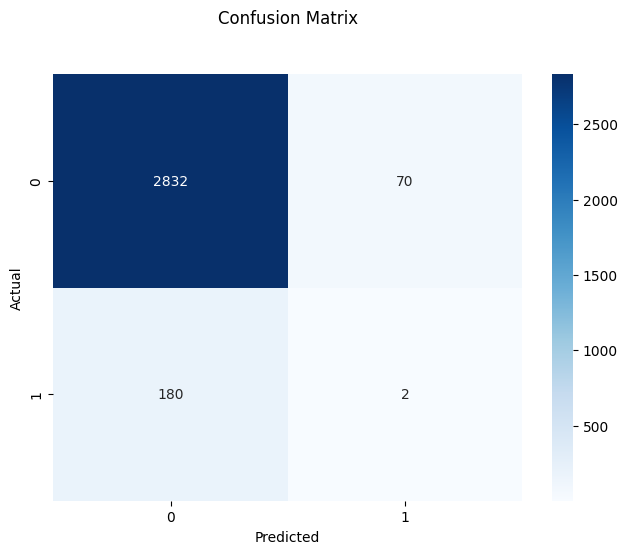

In [ ]:
def k_means(X_train_scaled, X_test_scaled, y_train, y_test):
    km_model = KMeans(
        n_clusters= 2,
        init='k-means++',
        n_init=10,
        random_state=0
    )
    # print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 'Yes')))
    # print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 'No')))

    X_train_res, y_train_res = SMOTE().fit_resample(X_train_scaled, y_train)
    km_model.fit(X_train_res, y_train_res)
    
    # print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 'Yes')))
    # print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 'No')))
    # km_model.fit(X_train_scaled)
    
    y_pred = km_model.predict(X_test_scaled)
    
    label_map = {0: 'No', 1: 'Yes'}
    y_pred = np.array([label_map[x] for x in y_pred])
    
    # Evaluation with confusion Matrix
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    # create heatmap
    sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt='d')
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return 

k_means(X_train_scaled, X_test_scaled, y_train, y_test)